<br><font size = 40> NSFW Frame by Frame detection </font>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from keras.models import load_model
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
import matplotlib.image as mpimg
import cv2

Using TensorFlow backend.


In [34]:
model = load_model("Final_weights.h5")

Porn [[0.16 0.79 0.05]]
With 0.7928863167762756 probability


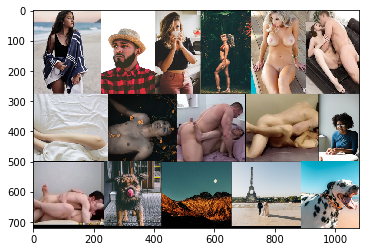

In [3]:
# https://stackoverflow.com/a/53403805/7437264
from PIL import Image
import numpy as np
from skimage import transform
def load(filename):
    np_image = Image.open(filename)
    np_image = np.array(np_image).astype('float32')/255
    np_image = transform.resize(np_image, (224, 224, 3))
    np_image = np.expand_dims(np_image, axis=0)
    img=mpimg.imread(filename)
    plt.imshow(img)
    return np_image

image = load("final.png")
ans = model.predict(image)
maping = {0 : "Neutral", 1 : "Porn", 2 : "Sexy"}
new_ans = np.argmax(ans[0])

print(maping[new_ans], np.round(ans,2))
print("With {} probability".format(ans[0][new_ans]))

In [4]:
print("Overall the pic is identified as : ", (maping[new_ans]))

Overall the pic is identified as :  Porn


In [5]:
im = Image.open('final.png')
width, height = im.size
print(width, height)

1080 720


In [6]:
import imutils
 
def pyramid(image, scale=1.5, minSize=(30, 30)):
    # yield the original image
    yield image
 
    # keep looping over the pyramid
    while True:
        # compute the new dimensions of the image and resize it
        w = int(image.shape[1] / scale)
        image = imutils.resize(image, width=w)
 
        # if the resized image does not meet the supplied minimum
        # size, then stop constructing the pyramid
        if image.shape[0] < minSize[1] or image.shape[1] < minSize[0]:
            break
 
        # yield the next image in the pyramid
        yield image
def sliding_window(image, stepSize, windowSize):
    # slide a window across the image
    for y in range(0, image.shape[0], stepSize):
        for x in range(0, image.shape[1], stepSize):
            # yield the current window
            yield (x, y, image[y:y + windowSize[1], x:x + windowSize[0]])

In [35]:
# https://www.pyimagesearch.com/2015/03/23/sliding-windows-for-object-detection-with-python-and-opencv/
import time
def check(unsave = 0):
    image = cv2.imread("final.png")
    (winW, winH) = (224, 224)
    maping = {0 : "Neutral", 1 : "Porn", 2 : "Sexy"}
    writer = None
    for resized in pyramid(image, scale=5):
        # loop over the sliding window for each layer of the pyramid
        for (x, y, window) in sliding_window(resized, stepSize=48, windowSize=(winW, winH)):
            # if the window does not meet our desired window size, ignore it

            if window.shape[0] != winH or window.shape[1] != winW:
                continue

            # THIS IS WHERE YOU WOULD PROCESS YOUR WINDOW, SUCH AS APPLYING A
            # MACHINE LEARNING CLASSIFIER TO CLASSIFY THE CONTENTS OF THE
            # WINDOW
            output = resized.copy()
            frame = cv2.cvtColor(window, cv2.COLOR_BGR2RGB)
            frame = frame/255.0
            preds = model.predict(np.expand_dims(frame, axis=0))[0]
            i = np.argmax(preds)
            label = maping[i]
            print(preds, label)
            
            if unsave:
                if i == 1:
                    return "Porn Found"
                
            
            if not unsave:
                clone = resized.copy()
                image = cv2.rectangle(clone, (x, y), (x + winW, y + winH), (0, 255, 0), 2)
                cv2.putText(image, label, (x, y+50), cv2.FONT_HERSHEY_SIMPLEX, 1.25, (0, 255, 0), 5)

                cv2.imshow("Window", clone)
                cv2.waitKey(1)
                time.sleep(0.09)

                if writer is None:
                # initialize our video writer
                    fourcc = cv2.VideoWriter_fourcc(*"MJPG")
                    writer = cv2.VideoWriter("1.avi", fourcc, 8, (1080, 720), True)


                # write the output frame to disk
                writer.write(clone)
    return "Save to View"
            

In [ ]:
check()

In [27]:
def isUnsave():
    ans = check(1)
    print(ans)
    

In [33]:
isUnsave()

[0.884288   0.03733872 0.07837324] Neutral
[0.92466986 0.04686474 0.02846538] Neutral
[0.9695858  0.01382466 0.01658955] Neutral
[0.9639047  0.0226059  0.01348948] Neutral
[0.9736614  0.01573283 0.01060573] Neutral
[0.9493291  0.03261146 0.01805944] Neutral
[0.23068254 0.43162733 0.33769011] Porn
Porn Found


# Summary 
Similiar to this isUnsave function we can check in image or video if it is save for chidren to view or not.